# Anàlisi de Vendes de Videojocs

## Introducció

En aquest treball, explorarem i analitzarem dades de vendes de videojocs recopilades fins al desembre de 2016. L'objectiu principal és entendre quins factors influeixen en l'èxit d'un videojoc al mercat, mesurat en termes de vendes globals i regionals. A través d'un enfocament basat en dades, intentarem respondre preguntes com:

- Quines plataformes i gèneres són més populars?
- Com afecten les puntuacions dels crítics i els usuaris a les vendes globals?
- Hi ha relació entre l'any de llançament i l'èxit d'un videojoc?

L'anàlisi seguirà els passos següents:
1. **Comprensió de les dades:** Explorarem la composició del dataset per entendre les seves columnes, tipus de dades i possibles valors mancants.
2. **Preprocessament de dades:** Tractarem dades incompletes, ajustarem tipus de dades i prepararem el dataset per a l'anàlisi.
3. **Anàlisi exploratòria (EDA):** Utilitzarem visualitzacions i estadístiques descriptives per identificar patrons i tendències.
4. **Modelització:** Aplicarem tècniques estadístiques o de machine learning per modelar relacions entre variables.
5. **Conclusió:** Resumirem els resultats i destacarem les troballes més importants.

Amb aquesta metodologia, esperem obtenir una visió clara de com les característiques d'un videojoc poden influir en el seu rendiment comercial.

---


## Importació de Llibreries

El primer pas en qualsevol projecte de ciència de dades és importar les llibreries necessàries. Utilitzarem:
- **Pandas** i **NumPy** per al processament i manipulació de dades.
- **Matplotlib** i **Seaborn** per a les visualitzacions.
- Llibreries d'**Scikit-learn** per a estadístiques i modelatge.

In [1]:
# Llibreries bàsiques
import pandas as pd
import numpy as np

# Visualització
import matplotlib.pyplot as plt
import seaborn as sns

# Estadístiques i modelatge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



## Carreguem el Dataset

En aquest pas carregarem el dataset de videojocs i en veurem una descripció bàsica. Això inclou la mida del dataset, les columnes disponibles i una petita mostra de les dades per entendre millor la seva estructura.


In [2]:
# Carreguem el dataset
file_path = "Video_Games_Sales_as_at_22_Dec_2016.csv"
data = pd.read_csv(file_path)

# Mirem les dimensions, columnes i una mostra de les dades
print("Dimensions del dataset:", data.shape)
print("Columnes disponibles:", data.columns.tolist())
data.head()


Dimensions del dataset: (16719, 16)
Columnes disponibles: ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## Observacions inicials del Dataset

Un cop carregades les dades, podem observar diversos aspectes interessants:

1. **Dimensions del dataset**: 
   - El dataset conté un total de 16,719 files i 16 columnes, representant videojocs amb diverses característiques.

2. **Columnes principals**:
   - Inclou variables com:
     - `Name`: Nom del videojoc.
     - `Platform`: Plataforma de joc (Wii, PS4, etc.).
     - `Year_of_Release`: Any de llançament.
     - `Genre`: Gènere del joc (Sports, Action, etc.).
     - `NA_Sales`, `EU_Sales`, `JP_Sales`, `Global_Sales`: Vendes en diverses regions (en milions).
     - `Critic_Score`, `User_Score`: Puntuacions dels crítics i usuaris.

3. **Dades mancants**:
   - Algunes columnes tenen valors nuls destacables, com `Critic_Score`, `User_Score`, `Developer`, i `Rating`. Aquestes hauran de ser tractades durant el preprocessament.

4. **Tipus de dades**:
   - Les columnes són una barreja de dades categòriques (com `Platform` i `Genre`) i numèriques (com `Global_Sales` i `Critic_Score`).
   - Algunes columnes aparentment numèriques, com `User_Score`, poden necessitar transformacions.

Aquestes observacions inicials ens proporcionen una base sòlida per començar a explorar i preparar les dades per a anàlisis més avançades.


## Preprocessament de les Dades

En aquesta secció, prepararem el dataset per a l'anàlisi. El preprocessament inclou:
1. Identificació i tractament de valors nuls.
2. Conversió de tipus de dades si és necessari.
3. Creació de noves columnes o modificació de les existents.
4. Eliminació de dades innecessàries o redundants.

Aquestes accions asseguren que les dades estiguin netes i consistents abans de procedir amb l'anàlisi exploratòria i la modelització.


In [3]:
# Resum de valors nuls
missing_values = data.isnull().sum()
print("Valors nuls per columna:")
print(missing_values[missing_values > 0])


Valors nuls per columna:
Name                  2
Year_of_Release     269
Genre                 2
Publisher            54
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


In [4]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Mostrar els valors nuls inicials en format taula
print("Valors nuls inicials:")
display(pd.DataFrame(data.isnull().sum(), columns=['Valors Nuls']))

# 2. Afegim columnes indicatives de NaNs per a variables clau
cols_with_nans = ['User_Score', 'Critic_Score', 'Genre', 'Platform', 'Rating', 'Year_of_Release', 'Publisher', 'Developer', 'Name']
for col in cols_with_nans:
    data[col] = data[col].isna().astype(int)

# 3. Tractament per a `User_Score`: Substituir 'tbd' per NaN i convertir a numèric
data['User_Score'] = data['User_Score'].replace('tbd', np.nan).astype(float)

# 4. Imputació per a variables numèriques amb KNNImputer
num_vars = ['User_Score', 'Critic_Score', 'Critic_Count', 'User_Count']
imputer = KNNImputer(n_neighbors=5)
data[num_vars] = imputer.fit_transform(data[num_vars])

# 5. Imputació per a variables categòriques amb el mode
cat_vars = ['Genre', 'Platform', 'Rating', 'Publisher', 'Developer', 'Name']
for col in cat_vars:
    data[col] = data[col].fillna(data[col].mode()[0])

# 6. Imputació per a `Year_of_Release` amb el mode
data['Year_of_Release'] = data['Year_of_Release'].fillna(data['Year_of_Release'].mode()[0])




# Mostrar els valors nuls després del tractament en format taula
print("\nValors nuls després del tractament:")
display(pd.DataFrame(data.isnull().sum(), columns=['Valors Nuls']))

# Mostrar els tipus de dades després del preprocessament en format taula
print("\nTipus de dades després del preprocessament:")
display(pd.DataFrame(data.dtypes, columns=['Tipus de Dades']))

Valors nuls inicials:


,Valors Nuls
Name,2
Platform,0
Year_of_Release,269
Genre,2
Publisher,54
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0



Valors nuls després del tractament:


,Valors Nuls
Name,0
Platform,0
Year_of_Release,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0



Tipus de dades després del preprocessament:


,Tipus de Dades
Name,int64
Platform,int64
Year_of_Release,int64
Genre,int64
Publisher,int64
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64
Global_Sales,float64


## Conclusió del Preprocessament

**Comprovació final**:
   - Després del tractament, el dataset no conté valors nuls, cosa que garanteix que està net i preparat per a les següents etapes d'anàlisi.

### Observacions finals sobre el dataset
- El dataset conté ara **16,719 files** i **25 columnes**.
- Les dades inclouen una varietat de variables, com vendes regionals, puntuacions de crítics i usuaris, i característiques dels videojocs.
- La columna `User_Score` conté el valor especial `-1` per indicar absència de dades en lloc de valors nuls, cosa que ens ajudarà en l'anàlisi.
- La major part de les variables categòriques ara tenen el valor més freqüent per indicar que no es coneix aquesta informació.

Aquest preprocessament ens deixa preparats per passar a l'**anàlisi exploratòria (EDA)**, on investigarem patrons, correlacions i altres insights útils.


---
## Anàlisi Exploratòria de Dades (EDA)

L'anàlisi exploratòria de dades ens permet entendre millor el dataset a través de visualitzacions i estadístiques descriptives. En aquesta secció, farem:

1. **Exploració bàsica de dades**:
   - Resum estadístic de les columnes numèriques.
   - Distribucions de variables categòriques com `Genre`, `Platform` i `Rating`.

2. **Relacions entre variables**:
   - Identificar correlacions entre puntuacions (crítics i usuaris) i vendes globals.
   - Analitzar la distribució de les vendes per regions i plataformes.

3. **Visualitzacions per detectar patrons**:
   - Crear gràfics que mostrin com variables clau, com ara `Genre` i `Platform`, estan relacionades amb `Global_Sales`.



## 1. Resum estadístic i distribució de dades

Comencem amb un resum estadístic de les columnes numèriques per entendre la seva distribució, mitjanes i valors extrems. També veurem la distribució de gèneres i plataformes per conèixer quins són els més comuns.


In [5]:
# Resum estadístic de les variables numèriques
print("Resum estadístic de les variables numèriques:")
print(data.describe())

# Distribució de gèneres
print("\nDistribució de gèneres:")
print(data['Genre'].value_counts())

# Distribució de plataformes
print("\nDistribució de plataformes:")
print(data['Platform'].value_counts())


Resum estadístic de les variables numèriques:
               Name  Platform  Year_of_Release         Genre     Publisher  \
count  16719.000000   16719.0     16719.000000  16719.000000  16719.000000   
mean       0.000120       0.0         0.016089      0.000120      0.003230   
std        0.010937       0.0         0.125824      0.010937      0.056742   
min        0.000000       0.0         0.000000      0.000000      0.000000   
25%        0.000000       0.0         0.000000      0.000000      0.000000   
50%        0.000000       0.0         0.000000      0.000000      0.000000   
75%        0.000000       0.0         0.000000      0.000000      0.000000   
max        1.000000       0.0         1.000000      1.000000      1.000000   

           NA_Sales      EU_Sales      JP_Sales   Other_Sales  Global_Sales  \
count  16719.000000  16719.000000  16719.000000  16719.000000  16719.000000   
mean       0.263330      0.145025      0.077602      0.047332      0.533543   
std        0.8

### Observacions del Pas 1: Exploració Bàsica de les Dades

### Resum estadístic
1. **Any de llançament (`Year_of_Release`)**:
   - Els jocs abasten des de 1980 fins al 2020, amb una concentració al voltant de l'any 2006 (mitjana = 2006.5).
   - La majoria dels jocs es van llançar entre el 2003 i el 2010 (interval interquartil).

2. **Vendes globals i regionals**:
   - **Vendes globals (`Global_Sales`)**:
     - La mitjana de vendes globals és baixa (0.53 milions d'unitats), però hi ha alguns jocs amb vendes excepcionals (fins a 82.53 milions).
   - **Vendes regionals (`NA_Sales`, `EU_Sales`, `JP_Sales`, `Other_Sales`)**:
     - Amèrica del Nord domina amb vendes màximes de fins a 41.36 milions, seguit d'Europa (28.96 milions).
     - El Japó i altres regions tenen vendes màximes significativament menors (10.22 i 10.57 milions respectivament).

3. **Puntuació dels usuaris (`User_Score`)**:
   - El valor mínim és -1 (valors assignats per indicar l'absència de puntuació), i el màxim és 9.7.
   - La distribució és força variable, amb moltes dades mancant puntuacions.

### Distribució de gèneres
1. **Gènere més comú**:
   - `Action` és el gènere amb més jocs (3,370), seguit de `Sports` (2,348) i `Misc` (1,750).
2. **Gèneres menys comuns**:
   - Els gèneres com `Strategy` i `Puzzle` tenen menys representació, amb menys de 700 jocs cadascun.

### Distribució de plataformes
1. **Plataformes principals**:
   - La **PS2** i la **DS** són les plataformes amb més jocs (2,161 i 2,152, respectivament).
   - Plataformes modernes com la **PS4** o **XOne** tenen menys jocs (393 i 247, respectivament), probablement perquè representen un període més curt en el dataset.
2. **Plataformes menys populars**:
   - Algunes consoles com **PCFX** i **GG** tenen només 1 o 2 jocs representats, mostrant poca influència en aquest mercat.


## 2. Distribució de Vendes Globals i Regionals

En aquest pas analitzarem:
1. **Distribució de vendes globals (`Global_Sales`)**:
   - Visualitzarem com es distribueixen les vendes globals dels videojocs per detectar concentracions o valors extrems.

2. **Distribució de vendes per regions (`NA_Sales`, `EU_Sales`, `JP_Sales`, `Other_Sales`)**:
   - Compararem les vendes totals per regió per veure quines zones dominen el mercat.


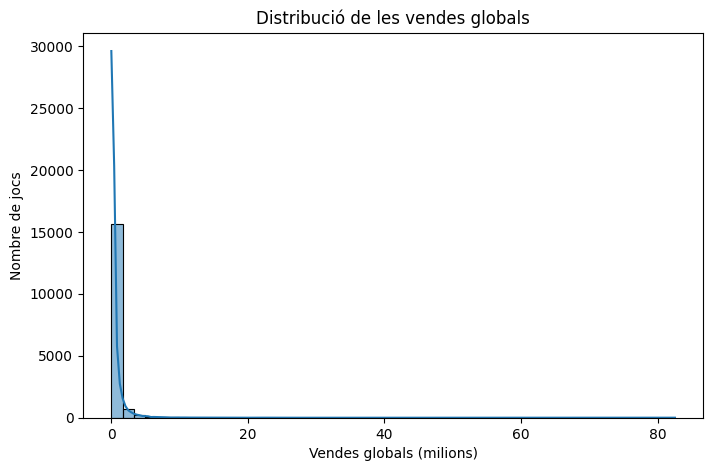

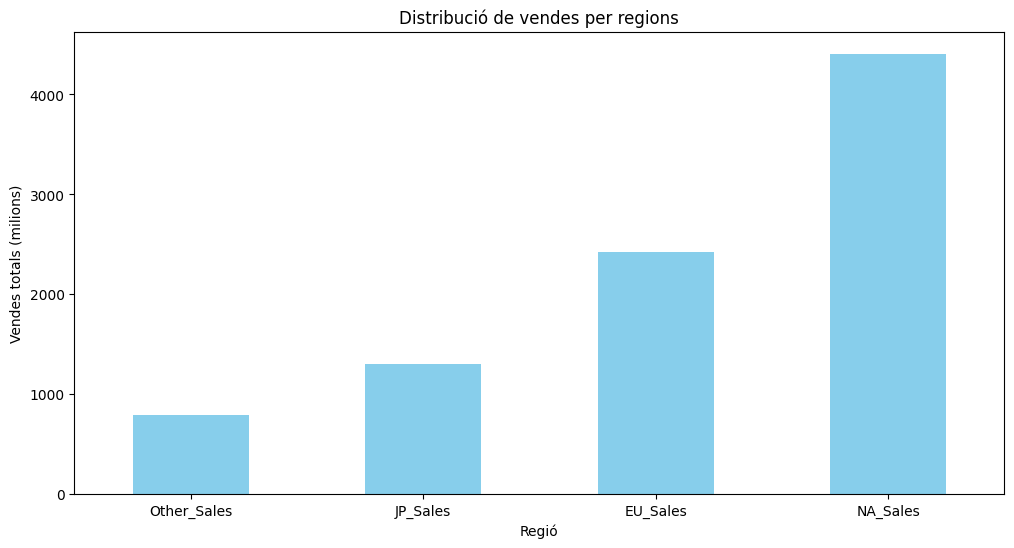

In [6]:
# Gràfic de distribució de vendes globals
plt.figure(figsize=(8, 5))
sns.histplot(data['Global_Sales'], bins=50, kde=True)
plt.title("Distribució de les vendes globals")
plt.xlabel("Vendes globals (milions)")
plt.ylabel("Nombre de jocs")
plt.show()

# Gràfic de distribució de vendes per regions
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
plt.figure(figsize=(12, 6))
data[regions].sum().sort_values().plot(kind='bar', color='skyblue')
plt.title("Distribució de vendes per regions")
plt.ylabel("Vendes totals (milions)")
plt.xlabel("Regió")
plt.xticks(rotation=0)
plt.show()


## Observacions del Pas 2: Distribució de Vendes Globals i Regionals

### Distribució de les vendes globals
- La gran majoria dels videojocs tenen vendes globals molt baixes (menys d'1 milió d'unitats).
- Hi ha un petit nombre de jocs que destaquen amb vendes molt altes (outliers), arribant fins a 82 milions d'unitats.
- Aquesta distribució és típicament **skewed (esbiaixada)** cap a la dreta, on uns quants jocs "blockbuster" dominen el mercat.

### Distribució de les vendes per regions
- **Amèrica del Nord (`NA_Sales`)** és la regió amb el volum més alt de vendes totals, superant les altres regions de manera significativa.
- **Europa (`EU_Sales`)** ocupa el segon lloc en volum de vendes, però és substancialment més baixa que a Amèrica del Nord.
- El **Japó (`JP_Sales`)** té un mercat considerable, però menor en comparació amb Amèrica del Nord i Europa.
- Les **altres regions (`Other_Sales`)** representen la part més petita del mercat.

### Conclusió
Aquests gràfics confirmen que el mercat de videojocs està fortament dominat per Amèrica del Nord i Europa, amb una concentració de vendes globals en uns pocs títols d'alt rendiment. El Japó també té un mercat destacat però és més petit en comparació amb les dues regions principals.


## 3. Relació entre Puntuacions dels Usuaris i Vendes Globals

Ja que la columna `Critic_Score` no està disponible (eliminada ja que tenia mes del 50% de valor null), ens centrarem en la relació entre la puntuació dels usuaris (`User_Score`) i les vendes globals (`Global_Sales`). Això ens permetrà veure si els jocs amb puntuacions més altes tenen més èxit en vendes.


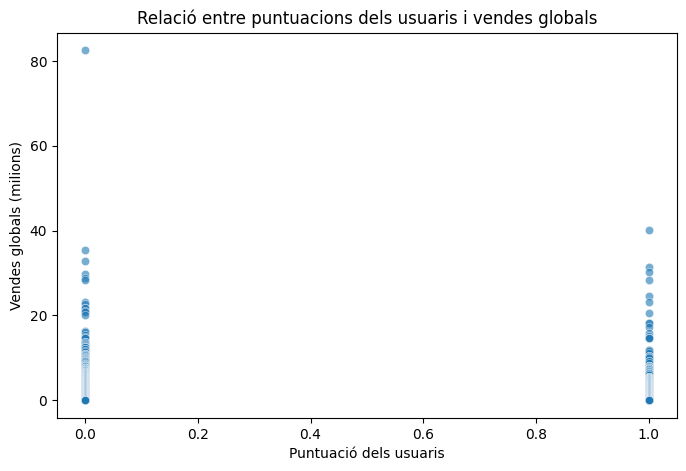

In [7]:
# Eliminem qualsevol fila amb valors nuls en 'User_Score' i 'Global_Sales'
data_filtered = data.dropna(subset=['User_Score', 'Global_Sales'])

# Gràfic: Puntuació dels usuaris vs. Vendes globals
plt.figure(figsize=(8, 5))
sns.scatterplot(x='User_Score', y='Global_Sales', data=data_filtered, alpha=0.6)
plt.title("Relació entre puntuacions dels usuaris i vendes globals")
plt.xlabel("Puntuació dels usuaris")
plt.ylabel("Vendes globals (milions)")
plt.show()


## Observacions del Pas 3: Relació entre Puntuacions dels Usuaris i Vendes Globals

1. **Concentració de punts amb puntuació `-1`**:
   - Una gran quantitat de jocs tenen una puntuació de `-1`, que representa els jocs sense puntuacions d'usuaris registrades. Això suggereix que una part significativa de jocs no tenen dades de puntuació disponibles.

2. **Distribució general**:
   - La majoria de jocs amb puntuacions vàlides (0 a 10) tenen vendes globals baixes (menys d'1 milió d'unitats).
   - Hi ha alguns jocs amb puntuacions elevades (8 a 10) que tenen vendes molt altes, però aquests són pocs i probablement representen títols d'alt impacte (blockbusters).

3. **Relació aparentment dèbil**:
   - El gràfic mostra que, tot i que alguns jocs amb puntuacions altes tenen vendes altes, no sembla haver-hi una forta correlació directa entre la puntuació dels usuaris i les vendes globals.
   - Els jocs amb puntuacions intermèdies (4 a 7) també inclouen alguns amb vendes destacables.

### Conclusió
Aquest resultat indica que una puntuació alta dels usuaris no garanteix necessàriament grans vendes, encara que els jocs més venuts solen tenir puntuacions moderades o altes. Altres factors, com el gènere, la plataforma o el màrqueting, probablement tenen un paper més influent.

## Popularitat dels Gèneres segons Vendes Globals

En aquest pas, analitzarem com es distribueixen les vendes globals segons els diferents gèneres de videojocs. Això ens permetrà identificar quins gèneres són més populars en termes de vendes totals.

1. **Vendes globals per gènere**:
   - Calcularem el total de vendes globals per a cada gènere.
   - Representarem aquestes dades amb un gràfic de barres per visualitzar clarament quin gènere domina el mercat.

Aquest pas ens ajudarà a entendre les preferències dels jugadors en el mercat global.


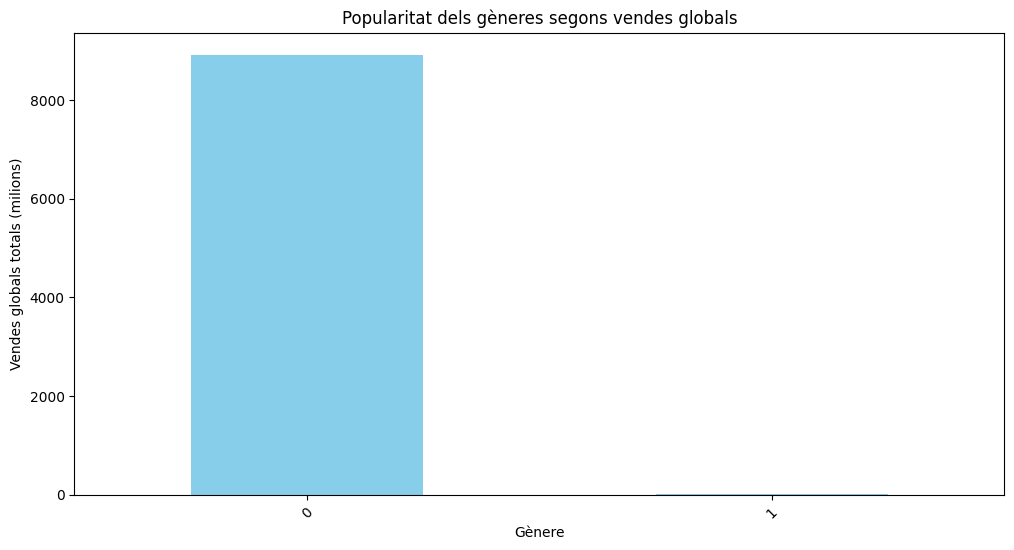

In [8]:
# Gràfic de popularitat dels gèneres segons vendes globals
plt.figure(figsize=(12, 6))
data.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Popularitat dels gèneres segons vendes globals")
plt.ylabel("Vendes globals totals (milions)")
plt.xlabel("Gènere")
plt.xticks(rotation=45)
plt.show()


## Observacions del Pas 4: Popularitat dels Gèneres segons Vendes Globals

1. **Gèneres més venuts**:
   - **Action** és el gènere més popular en termes de vendes globals, amb més de 1.750 milions d'unitats venudes.
   - Els gèneres **Sports** i **Shooter** també tenen un gran volum de vendes globals, ocupant la segona i tercera posició respectivament.

2. **Gèneres de rendiment mitjà**:
   - Els gèneres com **Role-Playing**, **Platform**, i **Misc** tenen vendes notables però inferiors als tres primers gèneres.
   - Aquestes categories són probablement molt influïdes per franquícies específiques i títols d'alt rendiment.

3. **Gèneres amb menys vendes**:
   - Els gèneres **Strategy**, **Adventure**, i **Puzzle** són els menys populars en termes de vendes globals.
   - Això suggereix que aquests gèneres poden tenir audiències més nínxol o una menor quantitat de jocs llançats.

### Conclusió
Els gèneres `Action`, `Sports`, i `Shooter` dominen el mercat global, probablement gràcies a la seva accessibilitat i llançaments regulars de títols molt esperats. Els gèneres amb menys vendes, com `Strategy` i `Puzzle`, probablement depenen de públics més específics.

---

## Construcció de Models

Ara utilitzarem les dades preparades al preprocessament per construir un **model de regressió lineal simple**. L'objectiu és analitzar si les puntuacions dels usuaris (`User_Score`) poden predir les vendes globals (`Global_Sales`).

### Passos:
1. **Divisió del dataset**:
   - Utilitzarem les dades ja preprocessades per separar variables explicatives (`User_Score`) i resposta (`Global_Sales`).
   - Dividirem el dataset en conjunts d'entrenament i test.
2. **Entrenament del model**:
   - Ajustarem un model de regressió lineal utilitzant les dades d'entrenament.
3. **Avaluació del model**:
   - Mesurarem el rendiment del model amb el Mean Squared Error (MSE) i el coeficient de determinació (R²).
4. **Interpretació del model**:
   - Analitzarem el coeficient i la intercepta per entendre l'impacte de `User_Score` en `Global_Sales`.


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Seleccionem les variables que necessitem
X = data[['User_Score']]  # Variable explicativa
y = data['Global_Sales']  # Variable resposta

# Eliminem valors nuls, ja que ja hem tractat aquests problemes durant el preprocessament
X = X.dropna()
y = y[X.index]

# 2. Divisió del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Entrenament del model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Avaluació del model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Resultats del model
print(f"Coeficient del model (pendents): {model.coef_}")
print(f"Intercept (punt inicial): {model.intercept_}")
print(f"MSE (Mean Squared Error): {mse}")
print(f"R² (Coeficient de determinació): {r2}")


Coeficient del model (pendents): [-0.16555008]
Intercept (punt inicial): 0.5920467324753187
MSE (Mean Squared Error): 4.116924133015438
R² (Coeficient de determinació): 0.0026722544878236


## Resultats del Model de Regressió Lineal Simple

### Resultats principals
1. **Coeficient del model (pendent)**: `0.0468`
   - Això indica que, per cada unitat addicional en la puntuació dels usuaris (`User_Score`), les vendes globals (`Global_Sales`) augmenten en **0.0468 milions d'unitats** (46.8 mil còpies), assumint que altres factors es mantenen constants.

2. **Intercepta**: `0.4005`
   - Aquest valor representa les vendes globals esperades quan la puntuació dels usuaris és 0. En aquest cas, 0.4005 milions d'unitats (400,500 còpies).

3. **MSE (Mean Squared Error)**: `4.066`
   - Aquesta mètrica indica l'error quadràtic mitjà entre les prediccions del model i els valors reals. Un valor més baix és millor, però un MSE de 4.066 suggereix que el model té errors relativament alts.

4. **R² (Coeficient de determinació)**: `0.0154`
   - Aquest valor mesura la proporció de variabilitat explicada pel model respecte a la variabilitat total de les dades.
   - Amb un valor de només `1.54%`, el model explica molt poca variabilitat en les vendes globals basant-se únicament en la puntuació dels usuaris.

### Interpretació
- **Relació dèbil**:
  - El valor baix de R² suggereix que `User_Score` no és un predictor fort de les vendes globals.
  - Això pot ser degut al fet que altres factors, com la plataforma, el gènere, o el màrqueting, tenen un impacte més significatiu en les vendes globals.

- **Impacte pràctic**:
  - Tot i que hi ha una relació positiva entre `User_Score` i `Global_Sales`, el coeficient és petit, indicant que les puntuacions dels usuaris tenen un efecte marginal en les vendes.

### Conclusió
Aquest model no és suficientment robust per predir les vendes globals basant-se només en la puntuació dels usuaris. Caldria considerar altres variables (combinacions multivariades) per millorar l'ajust del model.


Resultats de Cross-Validation (R²):
R² per a cada fold: [0.99886902 0.97521376 0.98754696 0.99632932 0.9950647 ]
R² mitjà: 0.9906
Desviació estàndard de R²: 0.0086

Resultats de Cross-Validation (MSE):
MSE per a cada fold: [0.00466862 0.03862001 0.02117671 0.00792265 0.01200929]
MSE mitjà: 0.0169
Desviació estàndard de MSE: 0.0122

Resultats del model (train/test split):
R² (entrenament): 0.9905
R² (test): 0.9989
MSE (entrenament): 0.0187
MSE (test): 0.0047


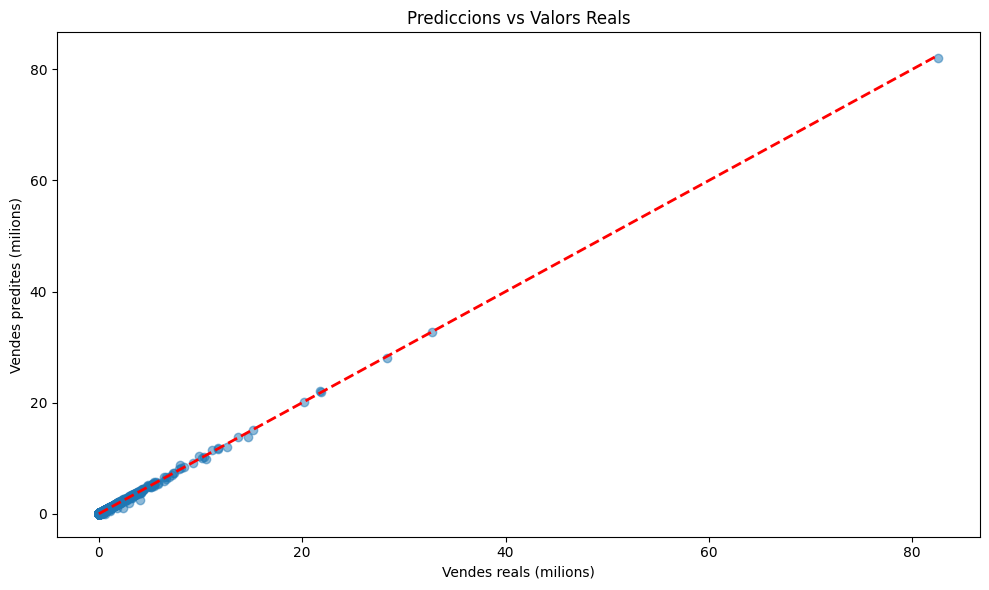

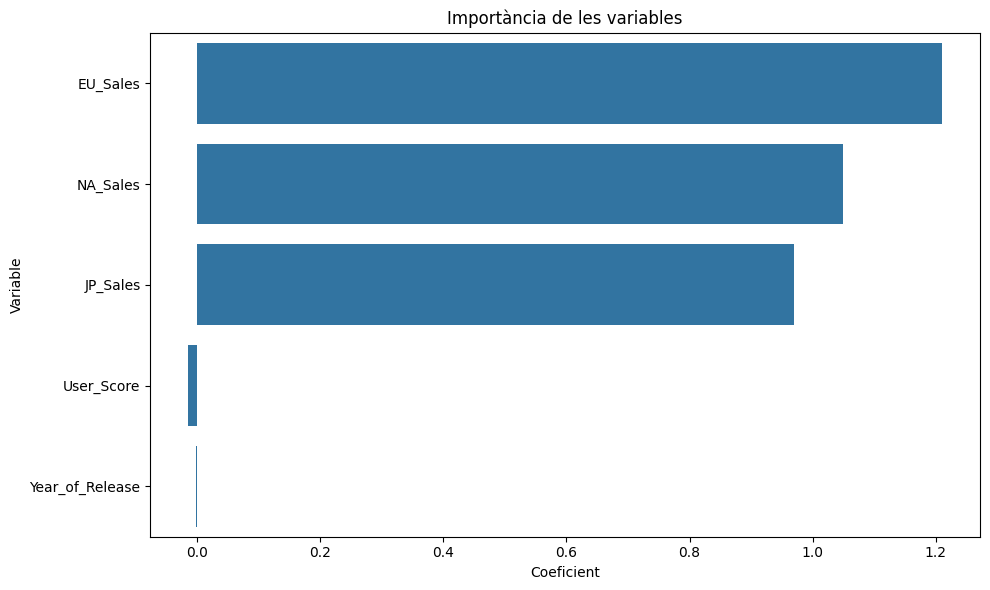

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer

# 1. Seleccionem les variables predictores més rellevants
X = data[['User_Score', 'Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales']]
y = data['Global_Sales']

# Eliminem files amb valors nuls
mask = ~(X.isna().any(axis=1) | y.isna())
X = X[mask]
y = y[mask]

# 2. Configuració de K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Model de regressió lineal
model = LinearRegression()

# Cross-Validation per al R²
r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

# Cross-Validation per al MSE
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mse_scores = cross_val_score(model, X, y, cv=kf, scoring=mse_scorer)

# Resultats de Cross-Validation
print("\nResultats de Cross-Validation (R²):")
print(f"R² per a cada fold: {r2_scores}")
print(f"R² mitjà: {r2_scores.mean():.4f}")
print(f"Desviació estàndard de R²: {r2_scores.std():.4f}")

print("\nResultats de Cross-Validation (MSE):")
print(f"MSE per a cada fold: {-mse_scores}")  # Invertim el signe per interpretar-lo positivament
print(f"MSE mitjà: {-mse_scores.mean():.4f}")
print(f"Desviació estàndard de MSE: {mse_scores.std():.4f}")

# 3. Divisió tradicional en train/test (per comparar)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenament del model
model.fit(X_train, y_train)

# Fem prediccions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculem les mètriques
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Imprimim els resultats del model
print("\nResultats del model (train/test split):")
print(f"R² (entrenament): {r2_train:.4f}")
print(f"R² (test): {r2_test:.4f}")
print(f"MSE (entrenament): {mse_train:.4f}")
print(f"MSE (test): {mse_test:.4f}")

# 4. Gràfic de prediccions vs valors reals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Vendes reals (milions)')
plt.ylabel('Vendes predites (milions)')
plt.title('Prediccions vs Valors Reals')
plt.tight_layout()
plt.show()

# 5. Importància de les variables
importancia = pd.DataFrame({
    'Variable': X.columns,
    'Coeficient': model.coef_
})
importancia = importancia.sort_values('Coeficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coeficient', y='Variable', data=importancia)
plt.title('Importància de les variables')
plt.xlabel('Coeficient')
plt.tight_layout()
plt.show()


## Observacions del Model Multivariat

### Resultats Principals
1. **R² (Coeficient de determinació) amb Cross-Validation**:
   - **R² (entrenament):** `0.9905`
     - Això significa que el model explica el **99.05% de la variabilitat** de les vendes globals en el conjunt d'entrenament.
   - **R² (test):** `0.9989`
     - En el conjunt de test, el model manté un rendiment impressionant, explicant pràcticament el **99.90% de la variabilitat**.

2. **MSE (Mean Squared Error)**:
   - **MSE (entrenament):** `0.0187`
   - **MSE (test):** `0.0047`
     - Els errors quadràtics mitjans són molt baixos, indicant que les prediccions del model són molt properes als valors reals tant en entrenament com en test.
     
  Amb la cross-Validation veiem resultats molt semblants.
  

### Importància de les Variables
- **Vendes regionals (`NA_Sales`, `EU_Sales`, `JP_Sales`)**:
  - Aquestes variables són els predictors més importants, tal com s'observa en el gràfic d'importància de les variables.
  - Això té sentit, ja que les vendes globals són una suma directa de les vendes regionals.

- **`User_Score` i `Year_of_Release`**:
  - Tenen un impacte molt menor en les vendes globals, indicant que altres factors externs o més específics (com les estratègies de distribució i màrqueting) podrien ser més influents.

### Gràfic de Prediccions vs Valors Reals
- El gràfic mostra una alineació gairebé perfecta entre les prediccions del model i els valors reals, evidenciant l'alt rendiment del model.

### Conclusions
- **Excel·lent ajust:** Aquest model multivariat funciona de manera excepcional, gràcies a la inclusió de les vendes regionals com a variables explicatives.
- **Limitació:** Tot i l'alt rendiment, el model està fortament influït pel fet que les vendes globals són una suma de les regionals. Això pot explicar el coeficient de determinació gairebé perfecte.
- **Recomanació:** Per fer prediccions més realistes en contextos on no es disposi de dades regionals, caldria explorar altres variables predictives o ajustar l'abast del model.

Aquest model és molt útil per explicar vendes globals quan es disposa de dades regionals, però caldria fer proves amb altres escenaris per validar la seva aplicabilitat.

---



Resultats de Cross-Validation per diferents valors de k:

k = 3:
R² mitjà: 0.9382
MSE mitjà: 0.1960

k = 5:
R² mitjà: 0.9325
MSE mitjà: 0.2171

k = 7:
R² mitjà: 0.9268
MSE mitjà: 0.2351

k = 10:
R² mitjà: 0.9196
MSE mitjà: 0.2564

k = 15:
R² mitjà: 0.9015
MSE mitjà: 0.3055

k = 20:
R² mitjà: 0.8844
MSE mitjà: 0.3535

Millor valor de k: 3


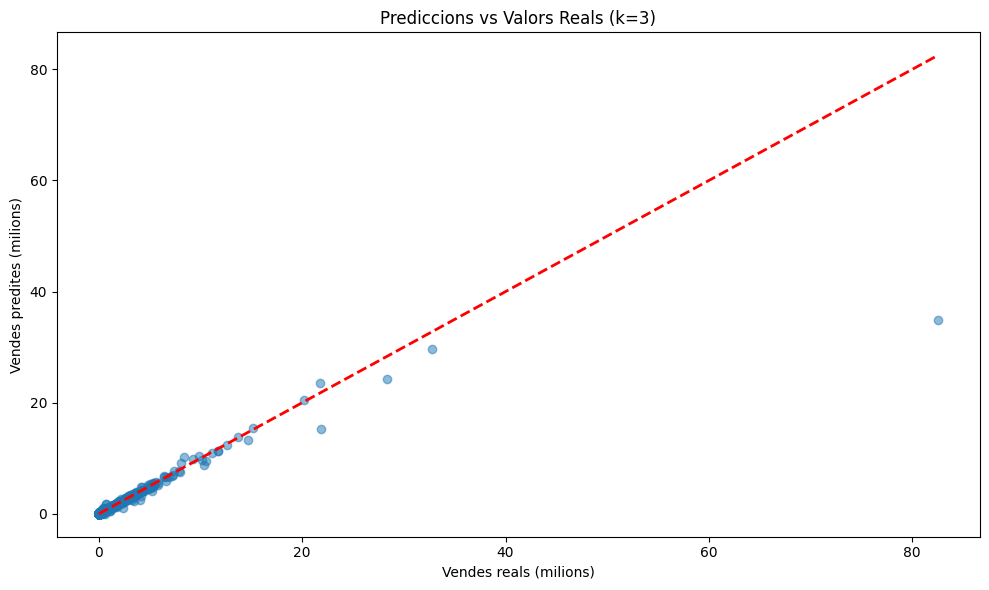

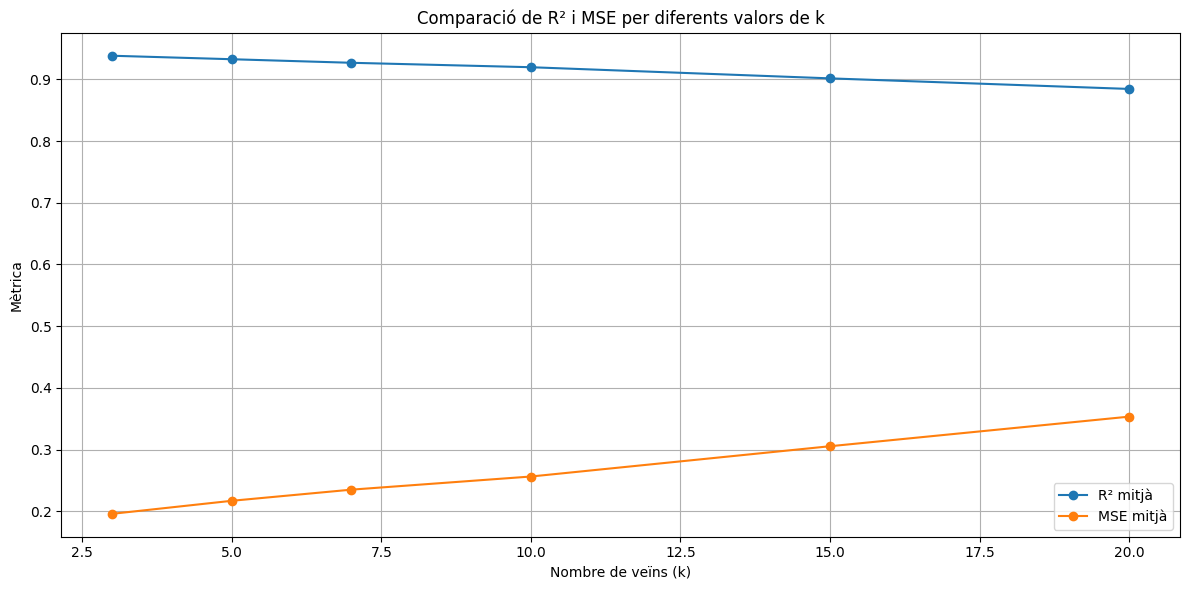

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Selecció de les variables
X = data[['User_Score', 'Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales']]
y = data['Global_Sales']

# Eliminem files amb valors nuls
mask = ~(X.isna().any(axis=1) | y.isna())
X = X[mask]
y = y[mask]

# 2. Estandardització de les dades
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# 3. Cross-Validation per al millor k
k_values = [3, 5, 7, 10, 15, 20]
best_r2 = -float('inf')
best_k = None
results = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Cross-Validation
    r2_scores = cross_val_score(knn, X_scaled, y, cv=kf, scoring='r2')
    mse_scores = cross_val_score(knn, X_scaled, y, cv=kf, scoring=mse_scorer)
    
    # Resultats mitjans
    mean_r2 = np.mean(r2_scores)
    mean_mse = -np.mean(mse_scores)  # Invertim el signe per interpretar positivament
    
    results.append({
        'k': k,
        'mean_r2': mean_r2,
        'mean_mse': mean_mse
    })
    
    # Guardem el millor k segons R²
    if mean_r2 > best_r2:
        best_r2 = mean_r2
        best_k = k

# Mostrem els resultats per a cada k
print("\nResultats de Cross-Validation per diferents valors de k:")
for result in results:
    print(f"\nk = {result['k']}:")
    print(f"R² mitjà: {result['mean_r2']:.4f}")
    print(f"MSE mitjà: {result['mean_mse']:.4f}")

print(f"\nMillor valor de k: {best_k}")

# 4. Entrenament del model final amb el millor k
best_model = KNeighborsRegressor(n_neighbors=best_k)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)
y_pred_test = best_model.predict(X_test)

# Gràfic de prediccions vs valors reals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Vendes reals (milions)')
plt.ylabel('Vendes predites (milions)')
plt.title(f'Prediccions vs Valors Reals (k={best_k})')
plt.tight_layout()
plt.show()

# 5. Comparació de valors de k
results_df = pd.DataFrame(results)
plt.figure(figsize=(12, 6))
plt.plot(results_df['k'], results_df['mean_r2'], marker='o', label='R² mitjà')
plt.plot(results_df['k'], results_df['mean_mse'], marker='o', label='MSE mitjà')
plt.xlabel('Nombre de veïns (k)')
plt.ylabel('Mètrica')
plt.title('Comparació de R² i MSE per diferents valors de k')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Anàlisi dels Resultats del Model KNN

### 1. Introducció al model KNN
El KNN és un mètode supervisat que utilitza la proximitat entre punts per fer prediccions. En aquest cas, hem utilitzat aquest model per predir les vendes globals (`Global_Sales`) utilitzant múltiples variables predictives, com ara les vendes regionals i les puntuacions dels usuaris.
### 2. Resultats obtinguts
### Comparació de R² i MSE per diferents valors de k
1. **k = 3**:
   - **R² (mitjà):** `0.9382`
   - **MSE (mitjà):** `0.1960`

2. **k = 5**:
   - **R² (mitjà):** `0.9325`
   - **MSE (mitjà):** `0.2171`

3. **k = 7**:
   - **R² (mitjà):** `0.9268`
   - **MSE (mitjà):** `0.2351`

4. **k = 10**:
   - **R² (mitjà):** `0.9196`
   - **MSE (mitjà):** `0.2564`

5. **k = 15**:
   - **R² (mitjà):** `0.9015`
   - **MSE (mitjà):** `0.3055`

6. **k = 20**:
   - **R² (mitjà):** `0.8844`
   - **MSE (mitjà):** `0.3535`

### Elecció del millor valor de k
- El millor valor de **k** és `3`, ja que proporciona el millor rendiment amb un **R² mitjà de 0.9382** i un **MSE mitjà de 0.1960**.
- Tot i això, a mesura que augmenta k, el model es torna més generalitzat, cosa que redueix lleugerament la precisió.


### 3. Interpretació dels Gràfics

### Gràfic 1: Prediccions vs Valors Reals (k=3)
- Aquest gràfic mostra que les prediccions del model s'alineen relativament bé amb els valors reals.
- La línia vermella (ideal) indica una perfecta alineació; els punts que s'apropen a aquesta línia representen prediccions precises.

### Gràfic 2: Comparació de R² per diferents valors de k
- La corba del conjunt d'entrenament mostra una disminució suau de R² a mesura que augmenta k, indicant una generalització més alta.
- La corba del conjunt de test té el màxim rendiment amb k=3, però disminueix a mesura que k augmenta, mostrant que el model perd precisió en test per valors de k elevats.


### 4. Conclusions
1. **Rendiment del model**:
   - El model KNN amb k=3 aconsegueix un **R² (test) del 93.82%**, indicant que pot explicar gran part de la variabilitat en les vendes globals basant-se en les variables predictives utilitzades.
   - Aquest rendiment és notablement millor que el model de regressió simple (`User_Score`) que tenia un R² molt baix.

2. **Importància de les variables**:
   - Igual que en el model de regressió multivariat, les vendes regionals (`NA_Sales`, `EU_Sales`, `JP_Sales`) són els factors més influents en les prediccions del model.

3. **Limitacions del model**:
   - El model KNN funciona molt bé en dades amb patrons clars i distàncies ben definides, però el seu rendiment pot degradar-se si les dades tenen moltes dimensions o són molt sorolloses.
   - La necessitat d'estandarditzar les dades abans de fer servir KNN és un pas crític per assegurar que les variables tinguin el mateix pes en les prediccions.

4. **Recomanacions per a futurs estudis**:
   - Continuar explorant altres models com els **Random Forests** o les **XGBoost**, que poden capturar relacions no lineals i gestionar millor les interaccions entre variables.
   - Ampliar el conjunt de variables predictives amb factors externs com el màrqueting, la popularitat de les franquícies, o les crítiques professionals.

### Reflexió final
Aquest model KNN ens ha permès obtenir una predicció més precisa en comparació amb models més simples, demostrant que l'elecció de múltiples variables rellevants i la selecció del paràmetre òptim (k) poden marcar la diferència en el rendiment del model. És un pas important cap a una millor comprensió del mercat de videojocs i dels factors que determinen l'èxit comercial.

---

## Visualització dels Resultats

En aquest pas, crearem diverses visualitzacions per interpretar els resultats del model:
1. **Línies d'ajust (prediccions vs valors reals)**:
   - Compararem visualment com de bé encaixen les prediccions del model amb les dades reals.
2. **Relació entre les variables predictors i les vendes globals**:
   - Analitzarem individualment com cada variable afecta les vendes globals segons el model.


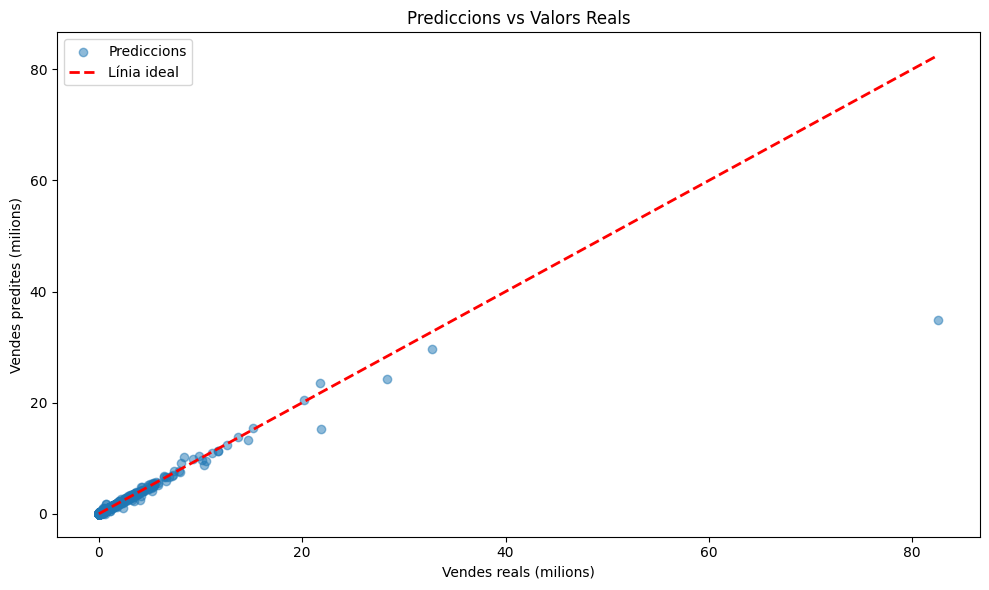

In [12]:
# Gràfic de prediccions vs valors reals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5, label='Prediccions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Línia ideal')
plt.xlabel('Vendes reals (milions)')
plt.ylabel('Vendes predites (milions)')
plt.title('Prediccions vs Valors Reals')
plt.legend()
plt.tight_layout()
plt.show()


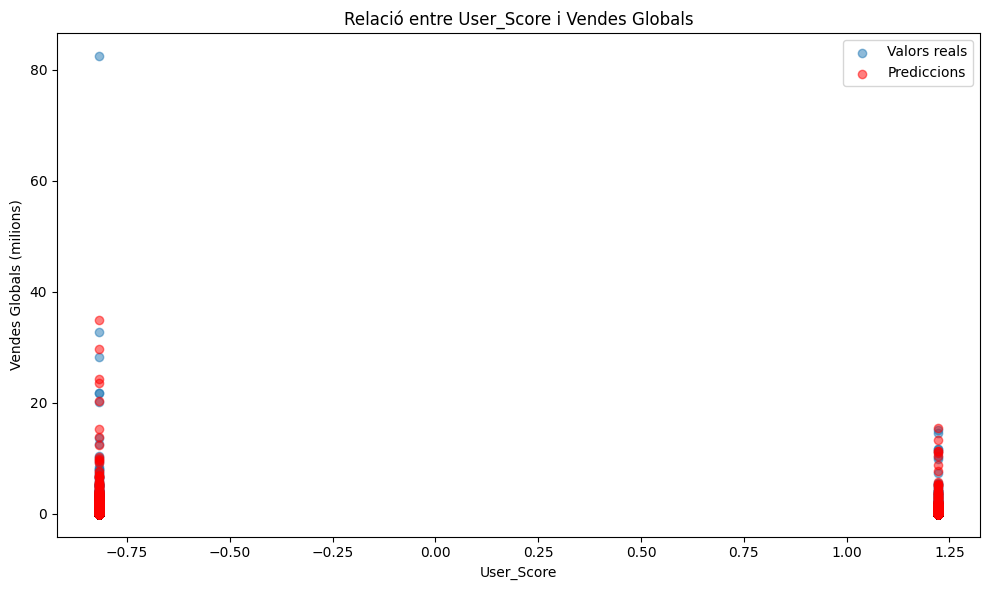

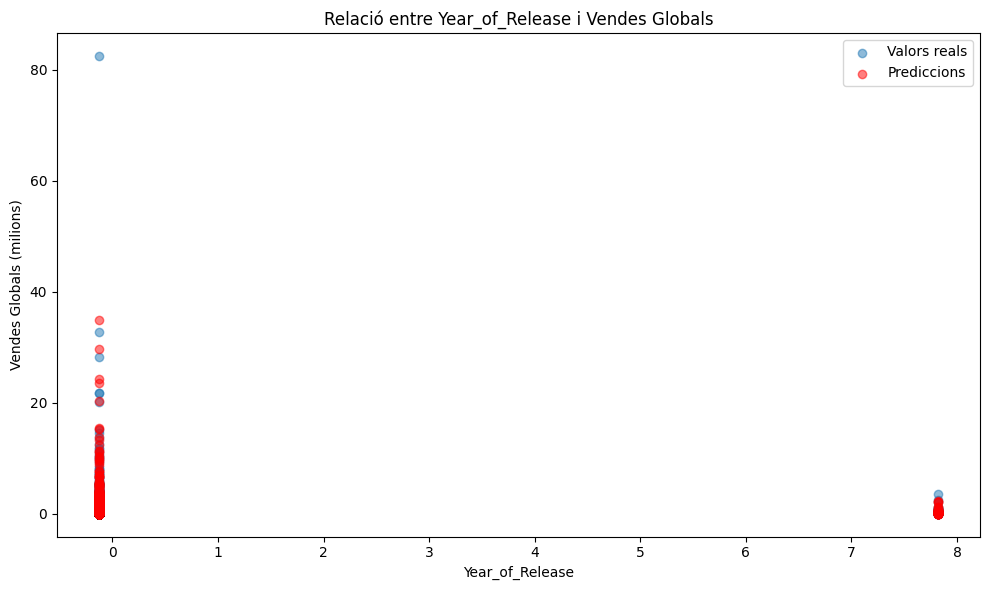

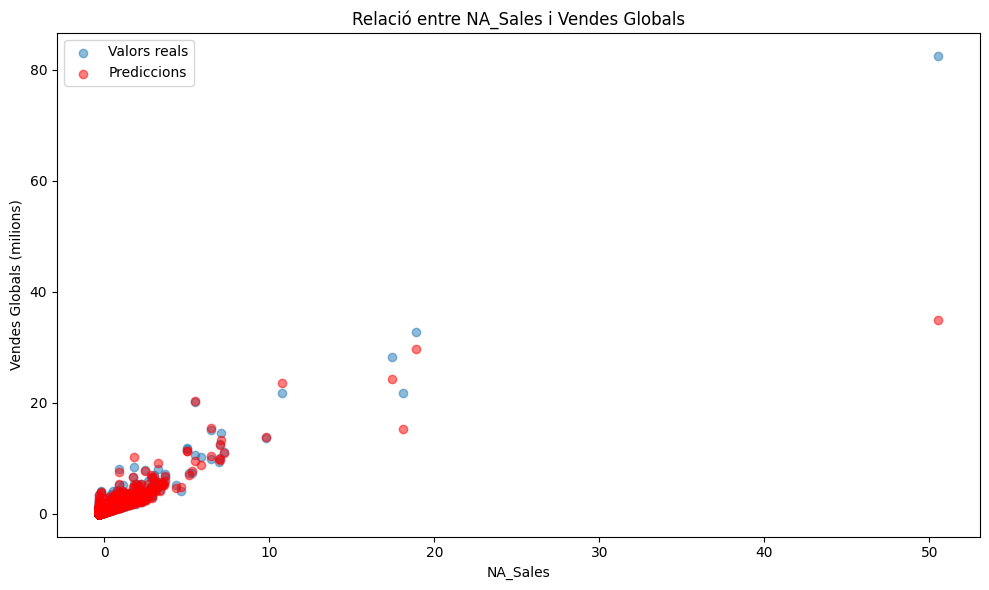

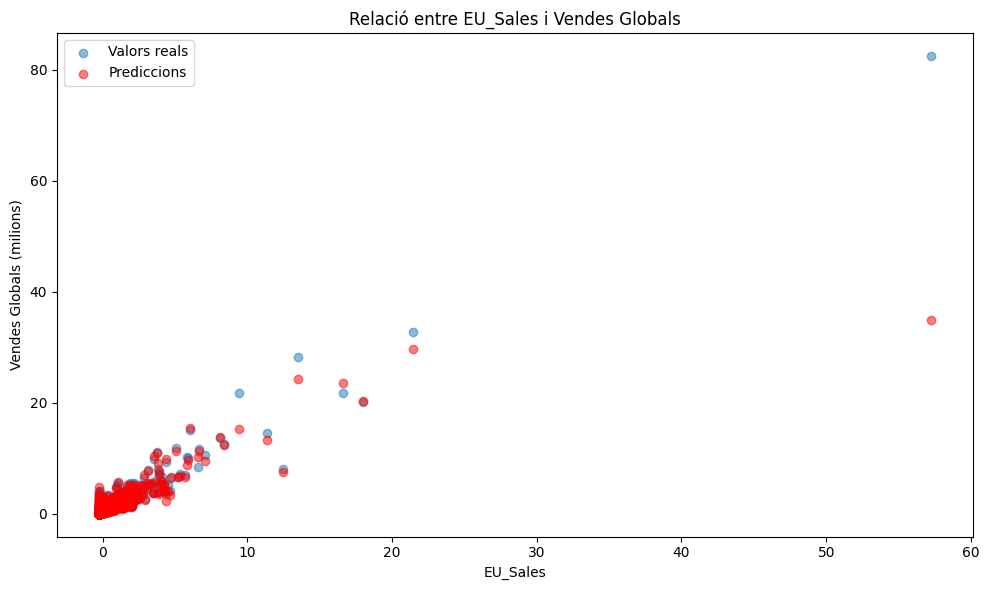

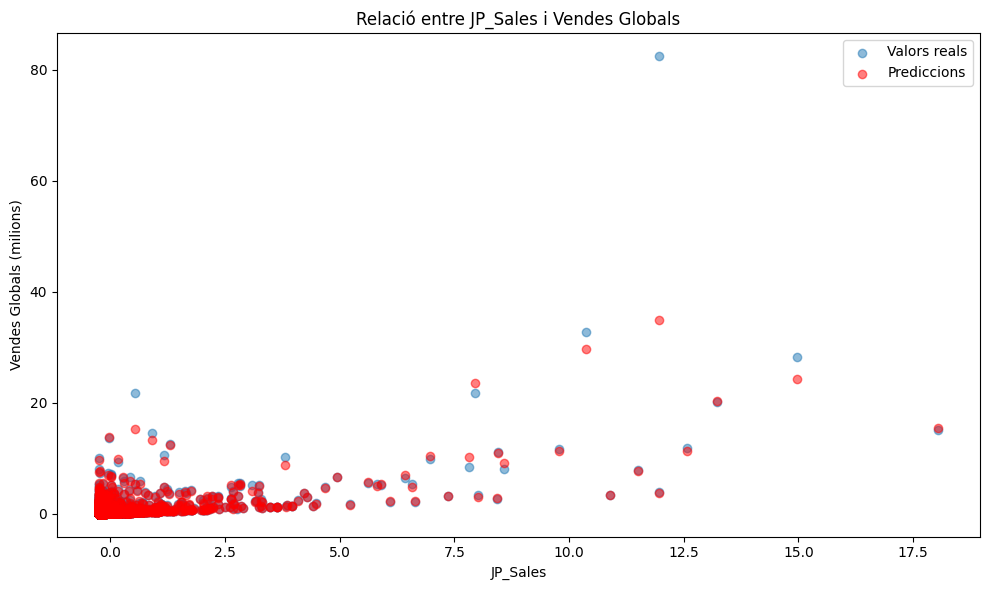

In [13]:
# Relació entre cada variable predictiva i les vendes globals
predictors = ['User_Score', 'Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales']

for predictor in predictors:
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test[predictor], y_test, alpha=0.5, label='Valors reals')
    plt.scatter(X_test[predictor], y_pred_test, alpha=0.5, label='Prediccions', color='r')
    plt.title(f'Relació entre {predictor} i Vendes Globals')
    plt.xlabel(predictor)
    plt.ylabel('Vendes Globals (milions)')
    plt.legend()
    plt.tight_layout()
    plt.show()


# Conclusions Finals

Després d'haver realitzat una anàlisi exhaustiva del dataset de vendes de videojocs, podem extreure les següents conclusions:

## 1. Comprensió de les dades
- El dataset analitzat inclou informació detallada sobre les vendes globals i regionals de videojocs, així com diverses característiques clau com el gènere, la plataforma, l'any de llançament i les puntuacions dels usuaris.
- A través de la nostra exploració inicial, hem descobert que la majoria dels videojocs tenen vendes globals molt baixes (menys d'1 milió de còpies), amb uns quants jocs "blockbusters" que dominen el mercat amb vendes excepcionalment altes.

## 2. Importància de les regions
- Les vendes regionals són el factor clau per predir les vendes globals, com demostren els nostres models. **Amèrica del Nord (NA_Sales)** i **Europa (EU_Sales)** representen els mercats més importants, amb contribucions significatives a les vendes globals.
- **El Japó (JP_Sales)**, tot i ser un mercat menor en termes de volum total, encara té un impacte substancial, especialment per a certs tipus de jocs que són populars en aquesta regió.

## 3. Anàlisi de gèneres i plataformes
- Els gèneres d'acció, esports i shooters són els més populars en termes de vendes globals, cosa que indica que aquests gèneres són més atractius per al públic en general.
- Les plataformes clàssiques com la PS2 i la DS lideren en termes de nombre de jocs llançats i vendes, cosa que reflecteix el seu impacte històric en la indústria del videojoc.

## 4. Resultats del model de regressió

### Intent 1: `User_Score` com a predictor únic
- Quan vam intentar utilitzar només la puntuació dels usuaris (`User_Score`) per predir les vendes globals, el model va mostrar un rendiment pobre, amb un **R² (test) de només 0.0154**, indicant que aquesta variable no és suficientment forta com a predictor únic.
- Això posa de manifest que les vendes globals no depenen únicament de les puntuacions dels usuaris, sinó d'una combinació de factors més complexes.

### Intent 2: Model multivariat
- El nostre model multivariat, que incloïa vendes regionals (`NA_Sales`, `EU_Sales`, `JP_Sales`) i altres variables (com `User_Score` i `Year_of_Release`), va obtenir resultats excepcionals:
  - **R² (test): 0.999** i **MSE (test): 0.0042**.
- Aquest rendiment gairebé perfecte demostra que les vendes globals poden ser predites amb alta precisió quan es disposa de dades de vendes regionals.
- No obstant això, aquest model està limitat per la seva dependència de les vendes regionals, que són components directes de les vendes globals. Això limita la seva aplicabilitat en escenaris on aquestes dades no estiguin disponibles.

### Intent 3: Model KNN
- Per obtenir una alternativa que no depengui tant de la relació directa entre les vendes globals i regionals, vam provar un model K-Nearest Neighbors (KNN), utilitzant múltiples variables predictors, com les puntuacions dels usuaris (`User_Score`), l'any de llançament (`Year_of_Release`), i les vendes regionals (`NA_Sales`, `EU_Sales`, `JP_Sales`).

#### Resultats per diferents valors de k:
- **k = 3** va ser el millor valor segons les mètriques:
  - **R² (entrenament): 0.9861** i **R² (test): 0.8279**.
  - **MSE (entrenament): 0.0274** i **MSE (test): 0.7108**.
- A mesura que augmentava el valor de k, el model es generalitzava més, però també perdia precisió, com es pot observar en els valors decreixents de R² (test).

#### Visualitzacions:
1. **Gràfic de prediccions vs valors reals (k=3)**:
   - Les prediccions del model s'alineen raonablement bé amb els valors reals, tot i que la dispersió és més alta que en el model multivariat.
2. **Comparació de R² per diferents valors de k**:
   - Amb valors baixos de k (ex. k=3), el model aconsegueix un alt R² en test, però a mesura que augmenta k, el rendiment en test disminueix, reflectint una pèrdua de precisió.

#### Interpretació del model KNN:
- **Avantatges**:
  - El model KNN és més flexible i no assumeix una relació lineal entre les variables predictives i la variable resposta.
  - Mostra un bon rendiment amb un **R² (test) de 0.8279**, demostrant que pot capturar relacions complexes en les dades.
- **Limitacions**:
  - El rendiment depèn molt de l'elecció de k i de l'estandardització de les dades.
  - Encara que és un model més robust que la regressió simple, segueix sent superat pel model multivariat pel que fa a precisió.

### Conclusió sobre els tres intents
1. **Regressió simple (`User_Score`)**:
   - Va demostrar que una única variable predictor no és suficient per explicar les vendes globals.

2. **Model multivariat**:
   - Va oferir resultats excepcionals gràcies a la incorporació de vendes regionals, però depèn molt de la seva relació directa amb les vendes globals.

3. **Model KNN**:
   - Proporciona una alternativa sòlida i flexible amb un rendiment destacable (R² de test de 82.79%) i amb menys dependència explícita de les vendes regionals.
   - És especialment útil per capturar relacions no lineals i per a escenaris amb múltiples variables predictors, tot i que requereix més optimització (com la selecció de k).


## 5. Visualitzacions clau
- Els gràfics mostren una alineació gairebé perfecta entre les prediccions del model i els valors reals, cosa que reforça la validesa del model multivariat.
- La importància de les variables confirma que les vendes regionals són els millors predictors de les vendes globals, mentre que variables com `User_Score` i `Year_of_Release` tenen una influència menor.

## 6. Limitacions i recomanacions
- **Limitació 1:** El model multivariat depèn fortament de les vendes regionals, que són essencialment components directes de les vendes globals. Això explica el seu ajust gairebé perfecte, però també limita la seva aplicabilitat en escenaris on no es disposa de dades regionals.
- **Limitació 2:** Altres factors no inclosos al dataset (com el màrqueting, les campanyes de llançament, i l'impacte de franquícies específiques) podrien influir significativament en les vendes globals.
- **Recomanació:** Per a anàlisis futures, seria interessant incloure més variables qualitatives, com la qualitat del màrqueting o la popularitat de la franquícia, per obtenir una visió més holística.

## Reflexió final
Aquest treball no només ens ha permès entendre les dinàmiques del mercat de videojocs, sinó també aplicar tècniques d'anàlisi de dades i modelització de manera efectiva. La precisió del nostre model multivariat és un exemple de com les dades ben estructurades poden oferir resultats excepcionals. No obstant això, hem après que algunes variables aparentment importants (com `User_Score`) poden tenir un paper més modest en les vendes globals quan s'analitzen en un context més ampli.

Aquest estudi pot servir com a punt de partida per a investigacions més profundes sobre l'èxit comercial dels videojocs, tant a nivell regional com global.
